# R Analysis

In [1]:
library("ggplot2")
library('dplyr')
library("reshape2")
library(tidyverse)
library(scales)  # for percentage scales

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘reshape2’ was built under R version 3.6.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ purrr   0.3.4
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘tibble’ was built under R version 3.6.2”
Warning message:
“package ‘tidyr’ was built under R version 3.6.2”
Warning message:
“package ‘purrr’ was built under R version 3.6.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘scales’ was built under R version 3.6.2”

Attaching package: ‘scales’


The follo

## Broward

In [2]:
df <- read.csv('../data/output/broward.csv')
df$minority <- factor(df$minority,levels = c("Low Minority", "Mid-Range Minority", "High Minority"))
df$poverty <- factor(df$poverty,levels = c("Low Poverty", "Mid-Range Poverty", "High Poverty"))
df$school_type <- factor(df$school_type,levels = c("Elementary School", "Middle School", "High School", "Combination School"))

In [3]:
head(df)

,school_name,school_number,covid.agg.enroll,covid.agg.attend,covid.avg,district_number,district_name,X1819.agg.attend,X1819.agg.enroll,X1819.avg,minority,poverty,title_i,school_type,grade
,<fct>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,ANNABEL C. PERRY PK-8,1631,7381,6667,90.32651,6,BROWARD,124508,131620,94.59657,High Minority,High Poverty,Title I,Combination School,B
2,APOLLO MIDDLE,1791,15320,14050,91.71018,6,BROWARD,237032,250084,94.78095,Mid-Range Minority,Mid-Range Poverty,Title I,Middle School,B
3,ATLANTIC TECHNICAL HIGH,2221,6622,6361,96.05859,6,BROWARD,119041,123474,96.40977,Mid-Range Minority,Mid-Range Poverty,Non-Title I,High School,A
4,ATLANTIC WEST ELEMENTARY,2511,6748,6071,89.96740,6,BROWARD,120886,128444,94.11572,High Minority,Mid-Range Poverty,Title I,Elementary School,C or below
5,ATTUCKS MIDDLE,343,9040,8165,90.32080,6,BROWARD,136578,143403,95.24069,Mid-Range Minority,Mid-Range Poverty,Title I,Middle School,B
6,BAIR MIDDLE,2611,10263,9236,89.99318,6,BROWARD,153586,162920,94.27081,Mid-Range Minority,Mid-Range Poverty,Title I,Middle School,B


### Florida's Poverty Classification

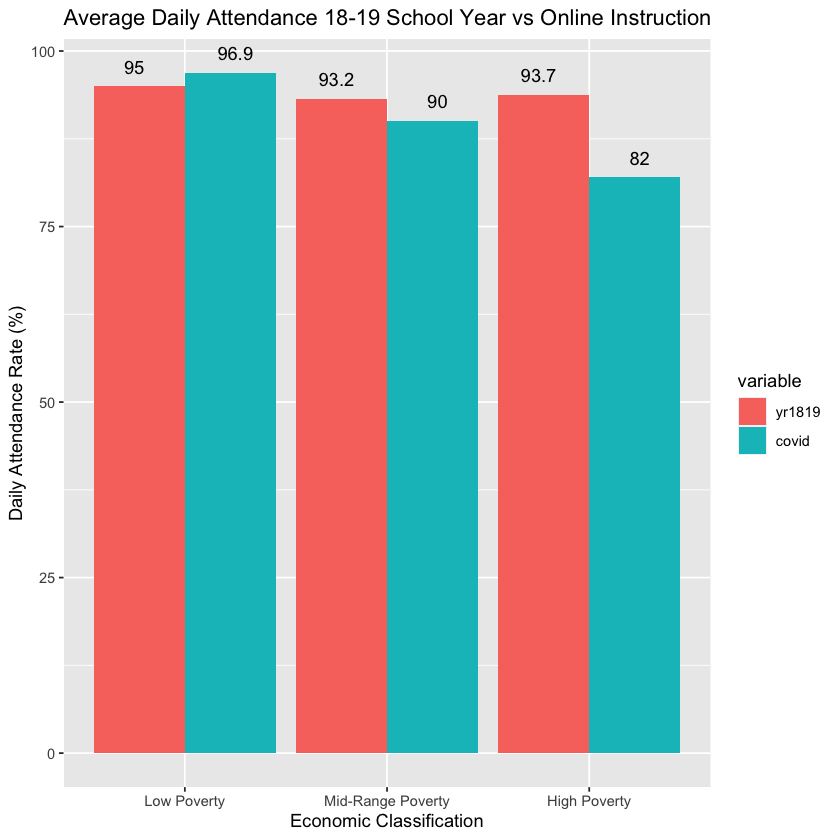

In [4]:
gd <- df %>% group_by(poverty) %>% summarise(
    covid= sum(covid.agg.attend) / sum(covid.agg.enroll) * 100, 
    yr1819= sum(X1819.agg.attend) / sum(X1819.agg.enroll) * 100)
dfm <- melt(gd[,c('poverty','yr1819','covid')],id.vars = 1)

poverty <- ggplot(dfm, aes(x=poverty, y=value)) + 
geom_bar(aes(fill = variable),stat = "identity",position = "dodge") + 
labs(y="Daily Attendance Rate (%)", x="Economic Classification") +
ggtitle("Average Daily Attendance 18-19 School Year vs Online Instruction") + 
geom_text(
    aes(poverty, value, group=variable, label=round(value, 1)), 
    position=position_dodge(width=1),
    vjust=-1
)

poverty

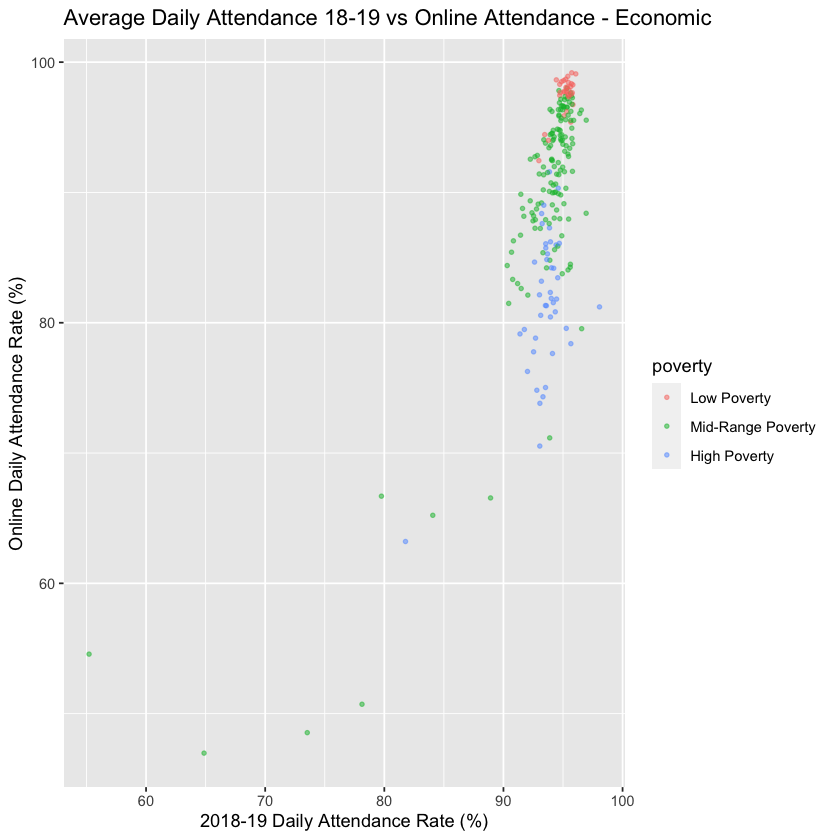

In [5]:
ggplot(df, aes(x=X1819.avg, y=covid.avg, color=poverty)) + geom_point(size=0.9, alpha=0.5) + 
ggtitle("Average Daily Attendance 18-19 vs Online Attendance - Economic") +
labs(x="2018-19 Daily Attendance Rate (%)", y="Online Daily Attendance Rate (%)")

### Florida's Minority Classification

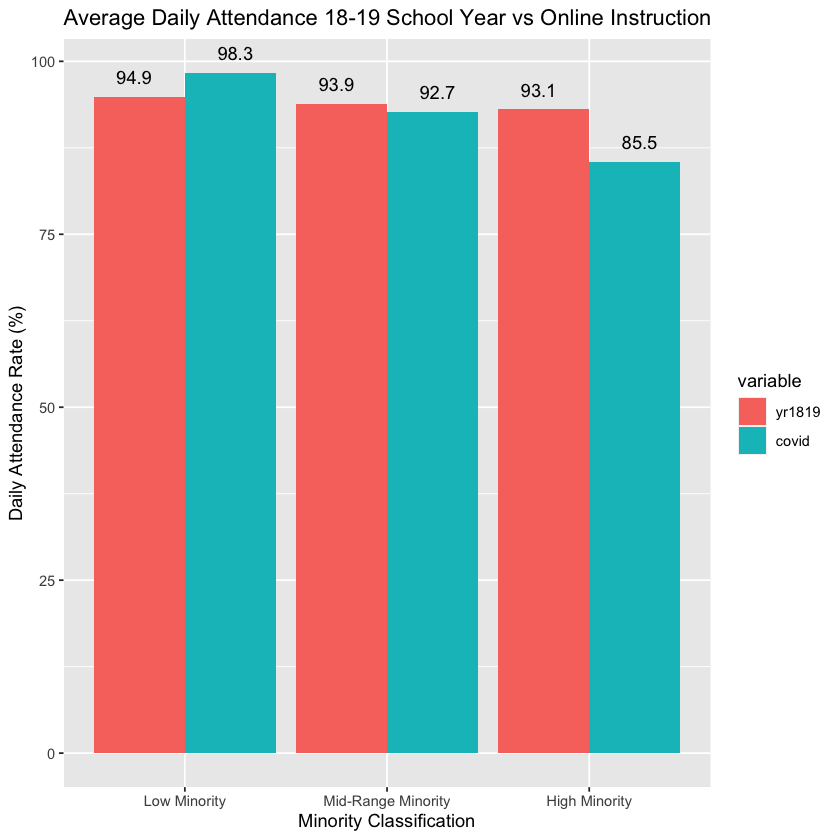

In [6]:
gd <- df %>% group_by(minority) %>% summarise(
    covid= sum(covid.agg.attend) / sum(covid.agg.enroll) * 100, 
    yr1819= sum(X1819.agg.attend) / sum(X1819.agg.enroll) * 100)
dfm <- melt(gd[,c('minority','yr1819','covid')],id.vars = 1)

ggplot(dfm, aes(x=minority, y=value)) + 
geom_bar(aes(fill = variable),stat = "identity",position = "dodge") + 
labs(y="Daily Attendance Rate (%)", x="Minority Classification") +
ggtitle("Average Daily Attendance 18-19 School Year vs Online Instruction") + 

geom_text(    aes(minority, value, group=variable, label=round(value, 1)), 
    position=position_dodge(width=1),
    vjust=-1
)


In [7]:
gd <- df %>% group_by(minority, poverty) %>% summarise( 
    count =n(),
    yr1819= sum(X1819.agg.attend) / sum(X1819.agg.enroll) * 100,
    covid= sum(covid.agg.attend) / sum(covid.agg.enroll) * 100)
gd

minority,poverty,count,yr1819,covid
<fct>,<fct>,<int>,<dbl>,<dbl>
Low Minority,Low Poverty,4,94.87207,98.34203
Mid-Range Minority,Low Poverty,28,94.99343,96.71602
Mid-Range Minority,Mid-Range Poverty,94,93.49066,91.27663
High Minority,Mid-Range Poverty,49,92.69042,87.29561
High Minority,High Poverty,43,93.73981,81.99503


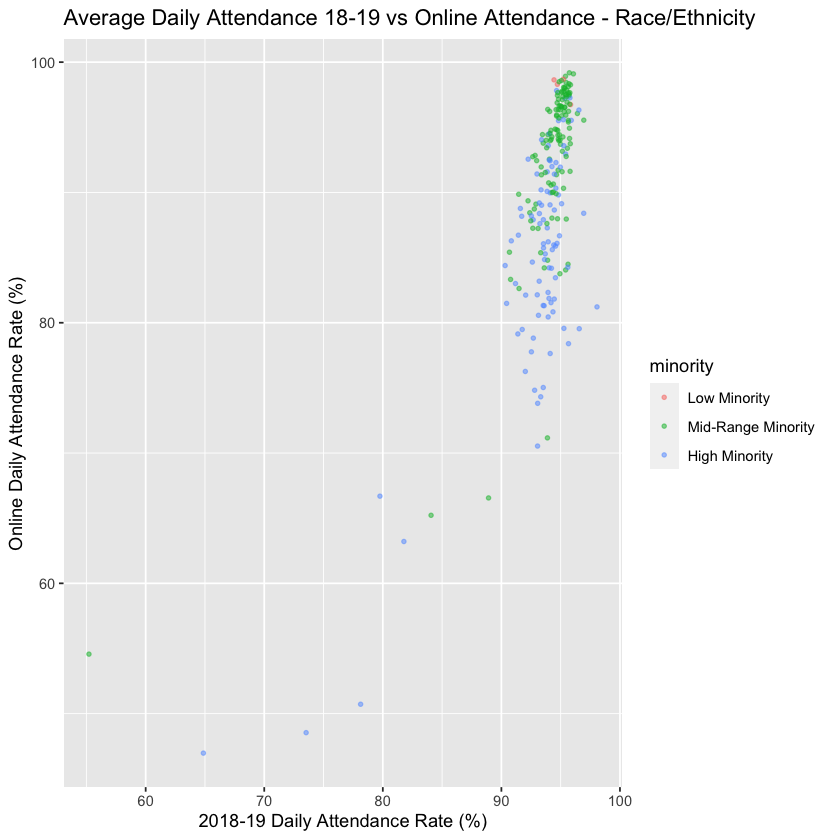

In [8]:
ggplot(df, aes(x=X1819.avg, y=covid.avg, color=minority)) + geom_point(size=0.9, alpha=0.5) + 
ggtitle("Average Daily Attendance 18-19 vs Online Attendance - Race/Ethnicity") +
labs(x="2018-19 Daily Attendance Rate (%)", y="Online Daily Attendance Rate (%)")

### Scorecard Grade

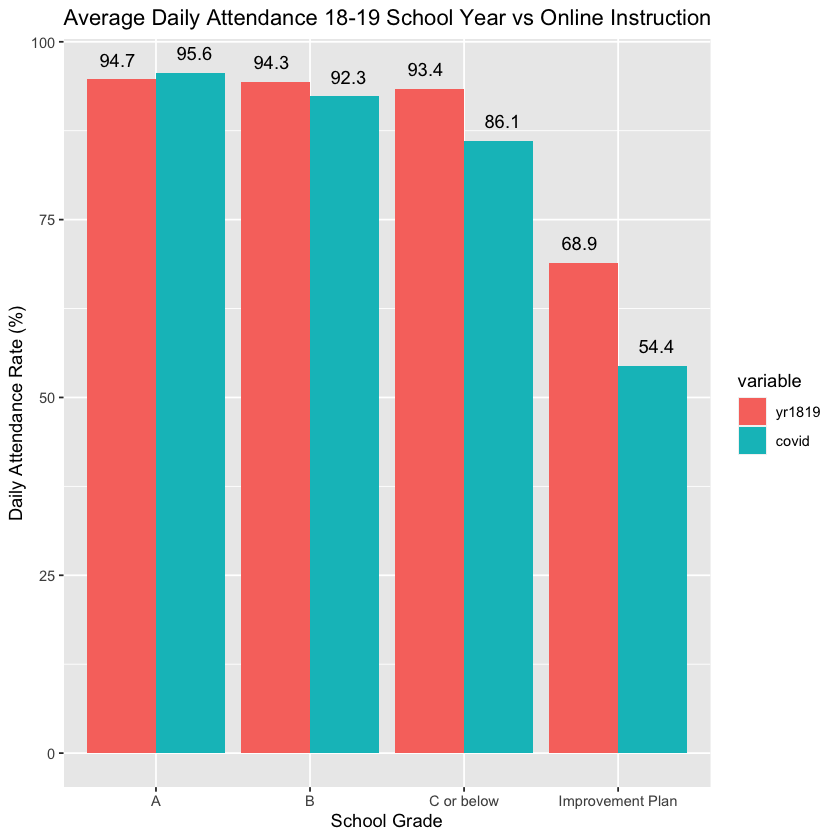

In [9]:
gd <- df %>% group_by(grade) %>% summarise(
    covid= sum(covid.agg.attend) / sum(covid.agg.enroll) * 100, 
    yr1819= sum(X1819.agg.attend) / sum(X1819.agg.enroll) * 100)
dfm <- melt(gd[,c('grade','yr1819','covid')],id.vars = 1)

scorecard <- ggplot(dfm, aes(x=grade, y=value)) + 
geom_bar(aes(fill = variable),stat = "identity",position = "dodge") + 
labs(y="Daily Attendance Rate (%)", x="School Grade") +
ggtitle("Average Daily Attendance 18-19 School Year vs Online Instruction") + 
geom_text(
    aes(grade, value, group=variable, label=round(value, 1)), 
    position=position_dodge(width=1),
    vjust=-1
)

scorecard

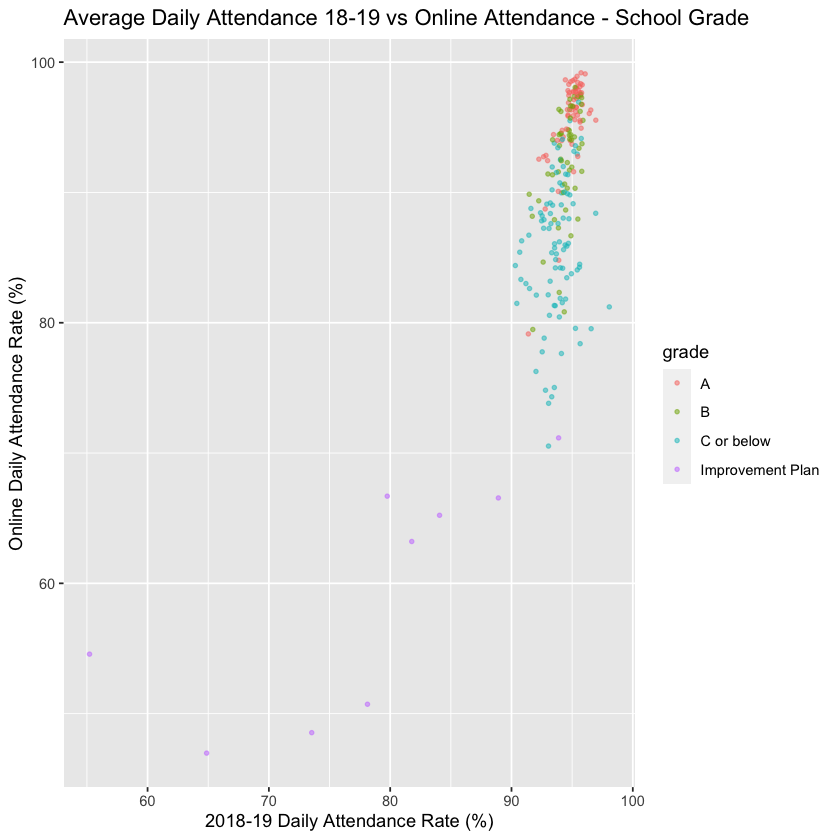

In [10]:
ggplot(df, aes(x=X1819.avg, y=covid.avg, color=grade)) + geom_point(size=0.9, alpha=0.5) + 
ggtitle("Average Daily Attendance 18-19 vs Online Attendance - School Grade") +
labs(x="2018-19 Daily Attendance Rate (%)", y="Online Daily Attendance Rate (%)")

## Miami-Dade

In [11]:
df <- read.csv('../data/output/miami-dade.csv')
df$minority <- factor(df$minority,levels = c("Low Minority", "Mid-Range Minority", "High Minority"))
df$poverty <- factor(df$poverty,levels = c("Low Poverty", "Mid-Range Poverty", "High Poverty"))
df$school_type <- factor(df$school_type,levels = c("Elementary School", "Middle School", "High School", "Combination School"))

### Florida's Poverty Classification

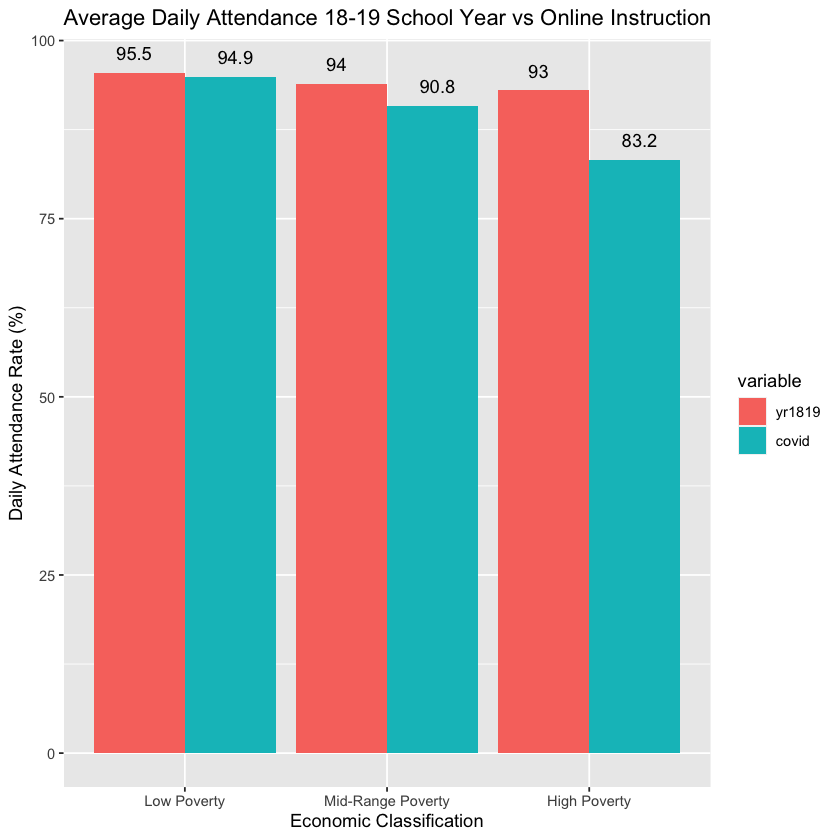

In [12]:
gd <- df %>% group_by(poverty) %>% summarise(
    covid=median(sum(covid.agg.attend) / sum(covid.agg.enroll) * 100), 
    yr1819=median(sum(X1819.agg.attend) / sum(X1819.agg.enroll) * 100))
dfm <- melt(gd[,c('poverty','yr1819','covid')],id.vars = 1)

poverty <- ggplot(dfm, aes(x=poverty, y=value)) + 
geom_bar(aes(fill = variable),stat = "identity",position = "dodge") + 
labs(y="Daily Attendance Rate (%)", x="Economic Classification") +
ggtitle("Average Daily Attendance 18-19 School Year vs Online Instruction") + 
geom_text(
    aes(poverty, value, group=variable, label=round(value, 1)), 
    position=position_dodge(width=1),
    vjust=-1
)

poverty

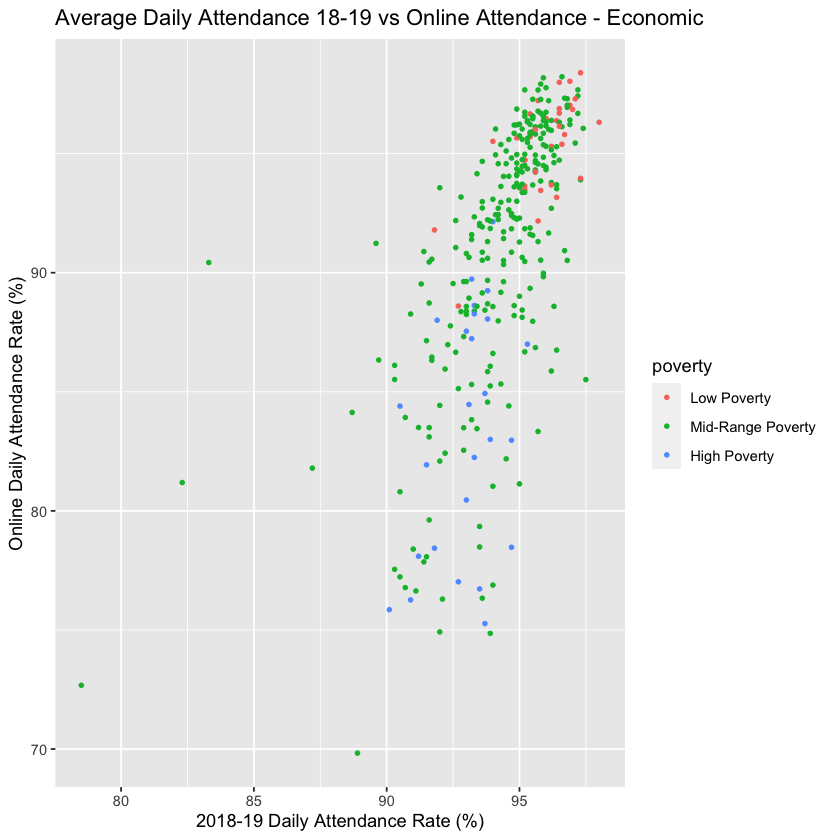

In [13]:
ggplot(df, aes(x=X1819.avg, y=covid.avg, color=poverty)) + geom_point(size=0.9) + 
ggtitle("Average Daily Attendance 18-19 vs Online Attendance - Economic") +
labs(x="2018-19 Daily Attendance Rate (%)", y="Online Daily Attendance Rate (%)")

### Florida's Minority Classification

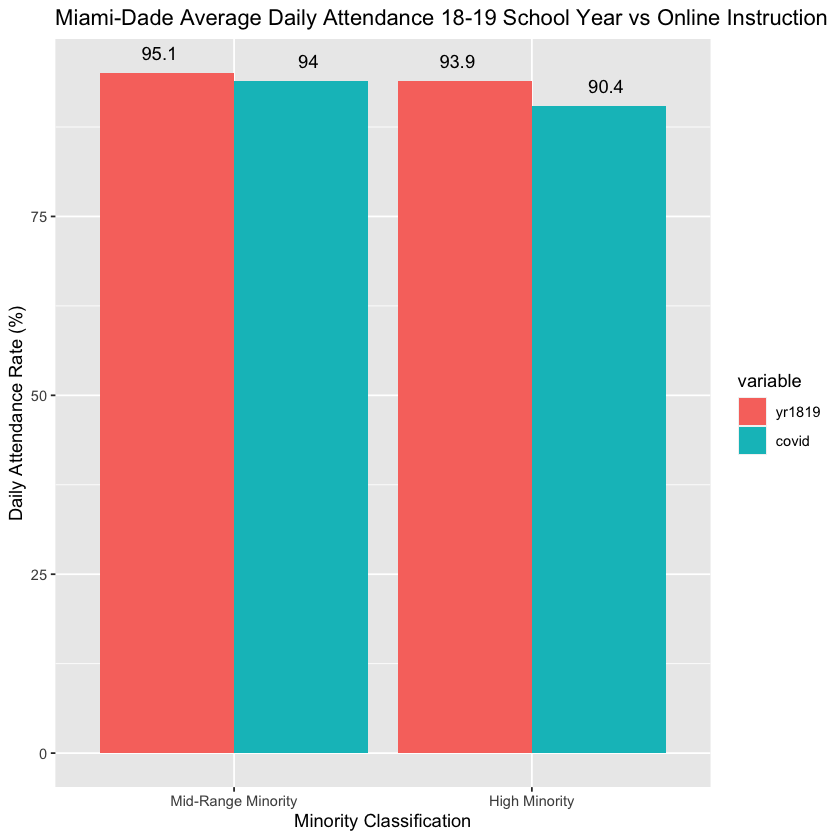

In [14]:
gd <- df %>% group_by(minority) %>% summarise( 
    covid = sum(covid.agg.attend) / sum(covid.agg.enroll) * 100,
    yr1819= sum(X1819.agg.attend) / sum(X1819.agg.enroll) * 100)
dfm <- melt(gd[,c('minority','yr1819','covid')],id.vars = 1)

ggplot(dfm, aes(x=minority, y=value)) + 
geom_bar(aes(fill = variable),stat = "identity",position = "dodge") + 
labs(y="Daily Attendance Rate (%)", x="Minority Classification") +
ggtitle("Miami-Dade Average Daily Attendance 18-19 School Year vs Online Instruction") + 
geom_text(    aes(minority, value, group=variable, label=round(value, 1)), 
    position=position_dodge(width=1),
    vjust=-1
)

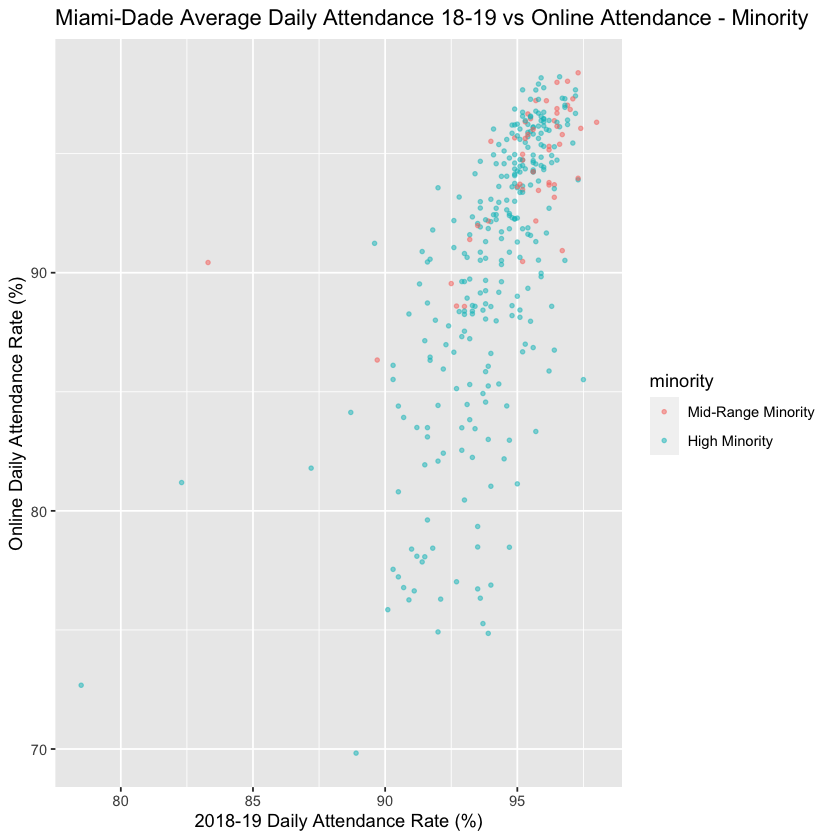

In [15]:
ggplot(df, aes(x=X1819.avg, y=covid.avg, color=minority)) + geom_point(size=0.9, alpha=0.5) + 
ggtitle("Miami-Dade Average Daily Attendance 18-19 vs Online Attendance - Minority") +
labs(x="2018-19 Daily Attendance Rate (%)", y="Online Daily Attendance Rate (%)")

### Scorecard Grade

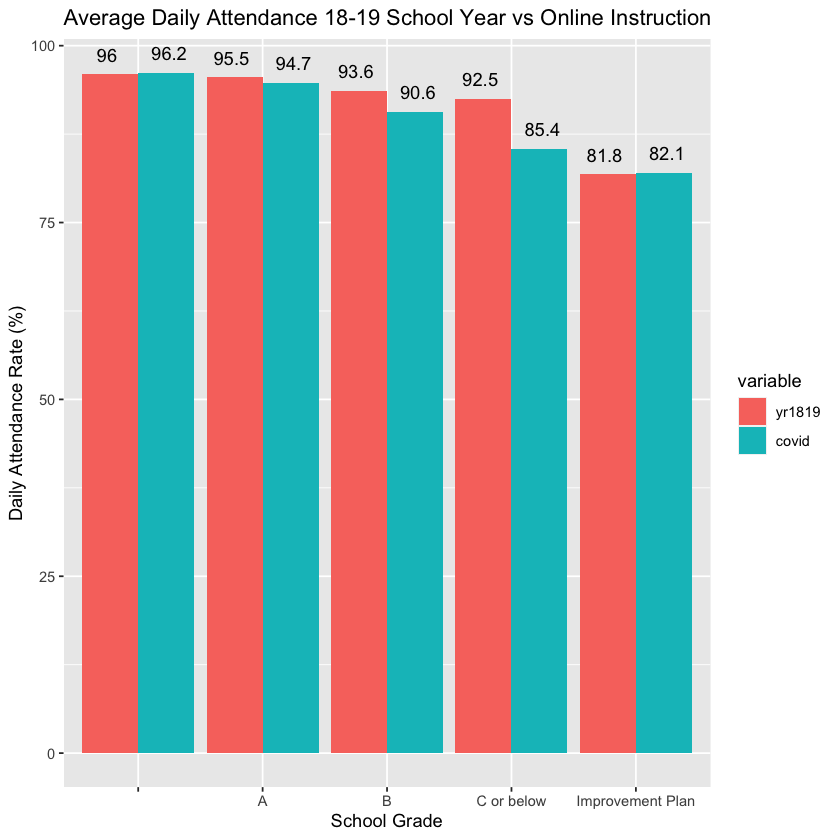

In [16]:
gd <- df %>% group_by(grade) %>% summarise(
    covid=mean(sum(covid.agg.attend) / sum(covid.agg.enroll) * 100), 
    yr1819=mean(sum(X1819.agg.attend) / sum(X1819.agg.enroll) * 100))
dfm <- melt(gd[,c('grade','yr1819','covid')],id.vars = 1)

scorecard <- ggplot(dfm, aes(x=grade, y=value)) + 
geom_bar(aes(fill = variable),stat = "identity",position = "dodge") + 
labs(y="Daily Attendance Rate (%)", x="School Grade") +
ggtitle("Average Daily Attendance 18-19 School Year vs Online Instruction") + 
geom_text(
    aes(grade, value, group=variable, label=round(value, 1)), 
    position=position_dodge(width=1),
    vjust=-1
)

scorecard

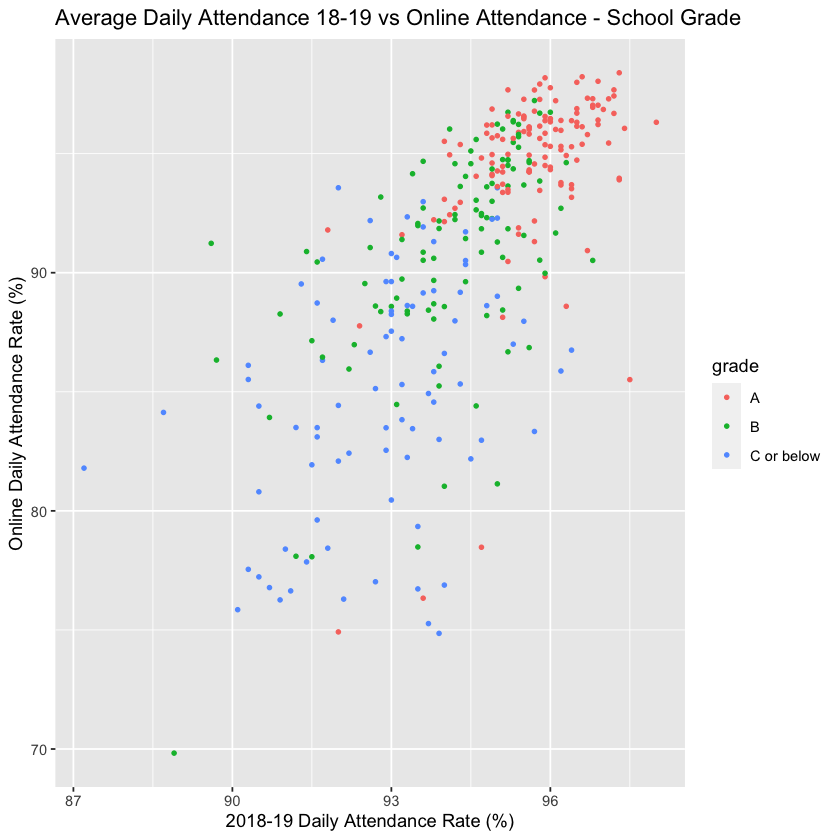

In [17]:
ggplot(filter(df, grade=="A" | grade=="B" | grade=="C or below"), aes(x=X1819.avg, y=covid.avg, color=grade)) + geom_point(size=0.9) + 
ggtitle("Average Daily Attendance 18-19 vs Online Attendance - School Grade") +
labs(x="2018-19 Daily Attendance Rate (%)", y="Online Daily Attendance Rate (%)")